In [440]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Loading Data.

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

#### Feature description:

**ID:** ID Number of Customers.

**Warehouse block:** The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment:** The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls:** The number of calls made from enquiry for enquiry of the shipment.

**Customer rating:** The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product:** Cost of the Product in US Dollars.

**Prior purchases:** The Number of Prior Purchase.

**Product importance:** The company has categorized the product in the various parameter such as low, medium, high.

**Gender:** Male and Female.

**Discount offered:** Discount offered on that specific product.

**Weight in gms:** It is the weight in grams.

**Reached on time:** It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [441]:
data = pd.read_csv('Train (4).csv')

data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data Preprocessing.

#### Steps involved in Data Preprocessing:

**1)** Data cleaning

**2)** Removing outliers

**3)** Encoding categorical variables

In [442]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [443]:
data.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

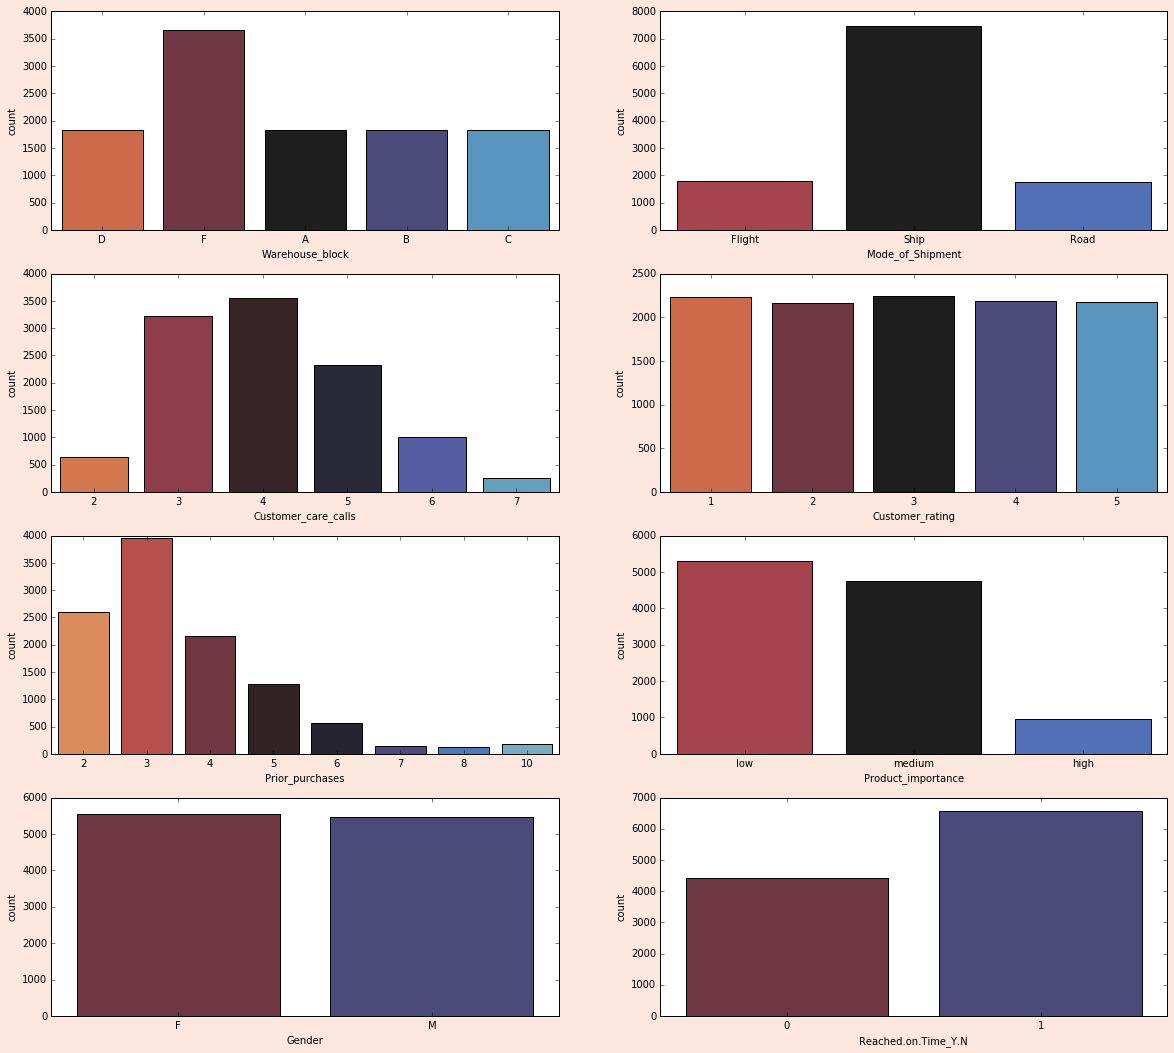

In [444]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

fig = plt.figure(figsize = (20, 18), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(4, 2, i+1)
    sns.countplot(data[cols[i]], palette='icefire_r')

plt.show()

In [445]:
data = data.drop('ID', axis=1) #the column is just indexes


#Assigning the featurs as X and trarget as y

y = data['Reached.on.Time_Y.N']
X = data.drop('Reached.on.Time_Y.N', axis=1)

In [446]:
# the featurs types

ordinal = [
    'Gender',
    'Product_importance'
]

nominal = [
    'Warehouse_block',
    'Mode_of_Shipment'
]

scal = [
    'Cost_of_the_Product',
    'Discount_offered',
    'Weight_in_gms'
]


# Building pipelins

transformer_for_ordinal = Pipeline([
    ('ordinal', OrdinalEncoder(categories='auto'))
])
transformer_for_nominal = Pipeline([
    ('nominal', OneHotEncoder())
])

transformer_for_scal = Pipeline([
    ('scaler', MinMaxScaler())
])

In [447]:
Transformer = ColumnTransformer(transformers=[
    ('ordinal', transformer_for_ordinal, ordinal),
    ('nominal', transformer_for_nominal, nominal),
    ('scal', transformer_for_scal, scal)
], sparse_threshold=0)

In [448]:
data_tran = pd.DataFrame(Transformer.fit_transform(X))
data_tran['y'] = y

data_tran

,0,1,2,3,4,5,6,7,8,9,10,11,12,y
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.378505,0.671875,0.033893,1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.560748,0.906250,0.304894,1
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.406542,0.734375,0.346676,1
3,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.373832,0.140625,0.025712,1
4,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.411215,0.703125,0.216654,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.728972,0.000000,0.078451,1
10995,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.635514,0.078125,0.035939,0
10996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.682243,0.046875,0.022498,0
10997,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.593458,0.015625,0.030533,0


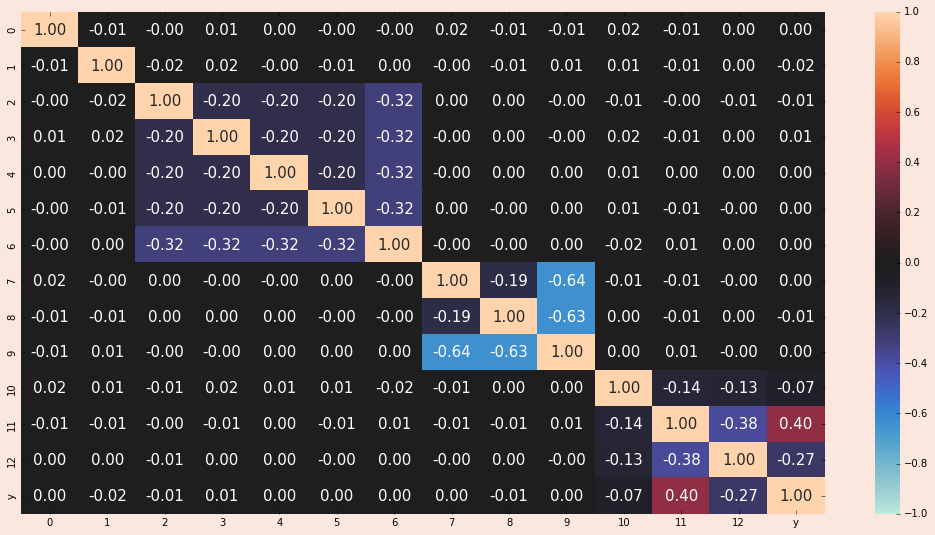

In [449]:
# correlation matrix

plt.figure(figsize = (18, 9), facecolor='#fbe7dd')
sns.heatmap(data_tran.corr(), annot = True, vmin=-1, vmax=1, fmt = '.2f', annot_kws={'size' : 15}, cmap= 'icefire')
plt.show()

We can clearly spot outliers. Next up, we will remove these data.

In [450]:
corr = data_tran.corr()

In [451]:
X_tran = data_tran[
    corr[abs(corr['y']) > 0.005]['y'].index
]

X_tran = X_tran.drop(['y'], axis=1)

X_tran

,1,2,3,8,10,11,12
0,1.0,0.0,0.0,0.0,0.378505,0.671875,0.033893
1,1.0,0.0,0.0,0.0,0.560748,0.906250,0.304894
2,1.0,1.0,0.0,0.0,0.406542,0.734375,0.346676
3,2.0,0.0,1.0,0.0,0.373832,0.140625,0.025712
4,2.0,0.0,0.0,0.0,0.411215,0.703125,0.216654
...,...,...,...,...,...,...,...
10994,2.0,1.0,0.0,0.0,0.728972,0.000000,0.078451
10995,2.0,0.0,1.0,0.0,0.635514,0.078125,0.035939
10996,1.0,0.0,0.0,0.0,0.682243,0.046875,0.022498
10997,2.0,0.0,0.0,0.0,0.593458,0.015625,0.030533


In [452]:
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, train_size=0.75, shuffle=True, random_state=42)

# Testing the Models.


In [453]:
Models = {
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                   Logistic Regression": LogisticRegression(),
    "                                   KNN": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier()
}

In [454]:
# Models Evaluation

for name, model in Models.items():
    model.fit(X_train, y_train)

    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

                         Decision Tree: 65.13%
                         Decision Tree: 68.15%
                         Decision Tree: 63.82%
                         Decision Tree: 65.67%
                         Decision Tree: 64.33%


In the above scores, Gradient Boosting appears to be the model with the best accuracy scoring. 